# Machine Learning Essentials SS25 - Exercise Sheet 6

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch as tc
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchsummary import summary

np.random.seed(42)
tc.manual_seed(42)

device = tc.device("cuda" if tc.cuda.is_available() else "cpu")

## Exercise 2 - CNN Classifier

The SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5. We first load the data and have the shapes printed out. The split into train, validation and test set has already been carried out.

In [ ]:
# Load the dataset
X_train = np.load('sign_data/X_train.npy')
Y_train = np.load('sign_data/Y_train.npy')
X_val = np.load('sign_data/X_val.npy')
Y_val = np.load('sign_data/Y_val.npy')
X_test = np.load('sign_data/X_test.npy')
Y_test = np.load('sign_data/Y_test.npy')

# print the shape of the dataset
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("Y_val shape: " + str(Y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape)+"\n")
print("classes: " + str(np.unique(Y_train)))

# check if classes are balanced
print("Counts of classes in Y_train: " + str(np.unique(Y_train, return_counts=True)[1]))
print("Counts of classes in Y_val: " + str(np.unique(Y_val, return_counts=True)[1]))
print("Counts of classes in Y_test: " + str(np.unique(Y_test, return_counts=True)[1]))

The classes are balanced so that accuracy is an appropriate measure for evaluating a classifier. We next visualize an instance of each class.

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(20, 10))
for i in range(6):
    # get indices where the label is i
    idx = np.where(Y_train == i)[0][0]
    axs[i].imshow(X_train[idx])
    axs[i].set_title("y = " + str(i))

Pixels in each channel (RGB) of the images take values in the range \[0, 255\]. However, it is desirable to have absolute values in the range \[0, 1\] as input for neural network architectures to avoid exploding or vanishing gradient problems. Through the following cell, we apply a simple data scaling procedure: we divide the values of the pixels by 255.
As an alternative, you can use the `StandardScaler()` function of the scikit-learn library.

In [ ]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

### Task 1

Use pytorch to build the model. Take a look at the [documentation](https://pytorch.org/tutorials/beginner/basics/intro.html) for an introduction, a detailed tutorial, for example for classifiers, can be found [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

Implement the following architecture:

     - Conv2d: 4 output channels, 3 by 3 filter size, stride 1, padding "same"
     - BatchNorm2d: 4 output channels
     - ReLU activation
     - MaxPool2d: 2 by 2 filter size, stride 2, padding 0
     - Conv2d: 8 output channels, 3 by 3 filter size, stride 1, padding "same"
     - BatchNorm2d: 8 output channels
     - ReLU activation
     - MaxPool2d: Use a 2 by 2 filter size, stride 2, padding 0
     - Flatten the previous output
     - Linear: 64 output neurons
     - ReLu activation function
     - Linear: 6 output neurons
     - LogSoftmax

We use the [LogSoftmax](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html) here instead of the Softmax for computational reasons. Accordingly, the loss function is not CrossEntropyLoss but NLLLoss. When flattening, be careful not to do it with the batch dimension but only with the height, width and channel dimension.

In [ ]:
class CNN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # TODO: Initialize the layers of the CNN
    
    def forward(self, X):
        # TODO: Implement the forward pass

        return X

To test your model you can foward some random numbers. The shape of the output should be (2, 6).

In [ ]:
cnn_model = CNN_Classifier()
# dummy sample of batch size 2
X_random = tc.randn(2, 3, 64, 64)
output = cnn_model(X_random)

print("Output shape: " + str(output.shape))

torchsummary.summary provides a nice overview of the model and the number of learnable parameters:

In [ ]:
summary(cnn_model, input_size=(3, 64, 64), device="cpu")

### Task 2

DataLoaders wrap around Datasets to provide efficient data batching, shuffling, and parallel loading during model training or inference. To define a custom dataset we must implement three functions: __init__, __len__ and __get_item__. While __len__ defines the length of the dataset and thus the number of batches in the dataloader, __get_item__ can be used to get a single sample through the index.

In [ ]:
class Image_Dataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        # TODO: Return the length of the dataset

    def __getitem__(self, idx):
        # TODO: Return the image as a float tensor and the label as a long tensor


In [ ]:
train_batch_size = 64
val_batch_size = len(Y_val)
test_batch_size = len(Y_test)

# TODO: Create the dataset and dataloader
train_dataset = 
val_dataset = 
test_dataset = 
train_loader = 
val_loader = 
test_loader = 

To make sure that everything has worked properly, we take a sample of the data_loader and visualize it.

In [ ]:
sample_X, sample_Y = next(iter(train_loader))
plt.imshow(sample_X[0].T)
plt.title("y = " + str(int(sample_Y[0].item())))
plt.show()

### Task 3

Implement the training loop. Use the negative log-likelihood loss (NLLLoss) and the Adam optimizer. Be sure to zero the gradients after each optimization step to avoid accumulating contributions from previous epochs and batches.

In [ ]:
def train_cnn(model, train_loader, val_loader, lr, n_epochs, device):
    model = model.to(device)

    # TODO: Initialize the optimizer and loss function
    loss_function =  
    optimizer = 

    train_loss = np.zeros(n_epochs)
    val_loss = np.zeros(n_epochs)
    train_acc = np.zeros(n_epochs)
    val_acc = np.zeros(n_epochs)

    for epoch in range(1, n_epochs + 1):
        model.train()

        epoch_loss = 0

        for X, Y in train_loader:
            X, Y = X.to(device), Y.to(device)
            # TODO: Implement the training loop

            epoch_loss += loss.item()/len(train_loader)
        
        train_loss[epoch - 1] = epoch_loss
        train_acc[epoch - 1] = (output.argmax(dim=1) == Y).float().mean().item()
        
        model.eval()

        with tc.no_grad():
            X, Y = next(iter(val_loader))
            X, Y = X.to(device), Y.to(device)
            # TODO: Implement the evaluation step
                  
            val_loss[epoch - 1] = loss.item()
            val_acc[epoch - 1] = (output.argmax(dim=1) == Y).float().mean().item()
        print(f"Epoch {epoch}/{n_epochs} - Train Loss: {epoch_loss:.4f}, Test Loss: {loss.item():.4f}")

    return train_loss, val_loss, train_acc, val_acc

In [ ]:
n_epochs = 50
# TODO: Train the model with different learning rates


In [ ]:
# TODO: Visualize the results

### Task 4

In [ ]:
# TODO: apply the best model to the test set


## Exercise 3 -  CNN Autoencoder

In the next task we want to build an autoencoder. It consists of an encoder, which transforms the data into a low-dimensional code, and a decoder, which reconstructs the original data. 

We use the Fashion MNIST dataset, which consists of 28x28 grayscale images. There are 10 classes, each representing different items of clothing. The data can be conveniently downloaded, separated and transformed with torchvision. As we will not be tuning any hyperparameters, we do not need a validation set.

In [9]:
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch import nn

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor (range [0, 1])
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load FashionMNIST train and test sets
train_data = datasets.FashionMNIST(
    root='./fashion_mnist',          # Download path
    train=True,            # Load training set
    download=True,         # Download if not already present
    transform=transform    # Apply transformations
)

test_data = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,           # Load test set
    download=True,
    transform=transform
)

classes = train_data.targets.unique()

# we only need a subset that consists of 1000 samples of each class for the train set
# and 10 samples of each class for the test set
indices_train = []
indices_test = []
for i in range(len(classes)):
    indices_train += list(np.where(train_data.targets == classes[i])[0][:1000])
    indices_test += list(np.where(test_data.targets == classes[i])[0][:10])
    
train_data.data = train_data.data[indices_train]
train_data.targets = train_data.targets[indices_train]
test_data.data = test_data.data[indices_test]
test_data.targets = test_data.targets[indices_test]

# Create DataLoaders 
train_batch_size = 256
test_batch_size = len(test_data) 
train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

# Print the shape of the dataset
print("train images shape: " + str(train_data.data.shape))
print("train labels shape: " + str(train_data.targets.shape))
print("test images shape: " + str(test_data.data.shape))
print("test labels shape: " + str(test_data.targets.shape))
print("classes: " + str(classes))

# check if classes are balanced
print("Counts of classes in train set: " + str(train_data.targets.unique(return_counts=True)[1]))
print("Counts of classes in test set: " + str(test_data.targets.unique(return_counts=True)[1]))

train images shape: torch.Size([10000, 28, 28])
train labels shape: torch.Size([10000])
test images shape: torch.Size([100, 28, 28])
test labels shape: torch.Size([100])
classes: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Counts of classes in train set: tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])
Counts of classes in test set: tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])


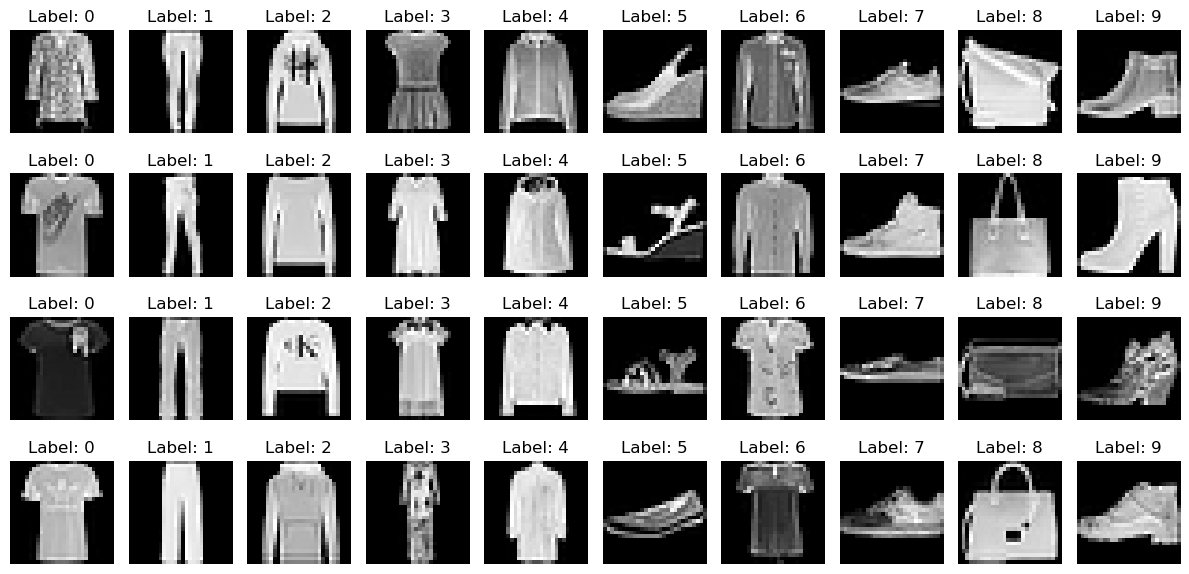

In [10]:
# Get a batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Visualize a batch of images
fig, axes = plt.subplots(4, 10, figsize=(12, 6))
for i in range(4):
    for j in range(10):
        # find the ith image of class j
        idx = np.where(labels == j)[0][i]
        axes[i, j].imshow(images[idx].squeeze(), cmap='gray')
        axes[i, j].set_title(f"Label: {j}")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()


### Task 1

We compare two architectures: a linear autoencoder and a CNN autoencoder. The latter typically consists of convolutional layers for the encoder and transposed convolutional layers for the decoder. In addition, fully connected layers can bring the feature to the desired code dimension (also called latent dimension). Implement the following architecture:

Encoder:
- Conv2d: 16 output channels, 3 by 3 filter size, stride 1, padding "same"
- ReLU activation
- MaxPool2d: 2 by 2 filter, stride 1, padding 0
- Conv2d: 32 output channels, 3 by 3, stride 1, padding "same"
- ReLU activation
- MaxPool2d: 2 by 2 filter, stride 1, padding 0
- Conv2d: 64 output channel, 3 by 3 filter size, stride 1, padding "same"
- ReLU activation
- MaxPool2d: 2 by 2 filter, stride 1, padding 0
- Flatten the previous output
- Linear: <_latent dimension_> output neurons

Decoder:
- Linear: 64x3x3 = 576 output neurons
- Unflatten the previous output to shape (64, 3, 3)
- ConvTranspose2d: 32 output channels, 3 by 3 filter size, stride 2, padding 0, output padding 0
- ReLU activation
- ConvTranspose2d: 16 output channels, 3 by 3 filter size, stride 2, padding 1, output padding 1
- ReLU activation
- ConvTranspose2d: 1 output channel, 3 by 3 filter size, stride 2, padding 1, output padding 1

You might need to infer the input dimension of the linear layer in the encoder.

In [21]:
class Conv_AE(nn.Module):
    def __init__(self, latent_dim):
        super(Conv_AE, self).__init__()

        # TODO: Initialize the layers of the encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0),
            nn.Flatten(),
            nn.Linear(in_features=64 * 25 * 25, out_features=latent_dim) # we have 3 maxpool2d layers, each reducing the spatial dimensions by 2, so the final size is 64 * 25 * 25
        )
        
        # TODO: Initialize the layers of the decoder
        self.decoder = nn.Sequential(
            nn.Linear(in_features=latent_dim, out_features=64 * 3 * 3),
            nn.Unflatten(1, (64, 3, 3)),
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=0, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1)
        )
            
    def forward(self, X):
        # TODO: Implement the forward pass
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


We check again whether the model is working properly.

In [25]:
import torch as tc
from torchsummary import summary

conv_ae_model = Conv_AE(2)
X_random = tc.randn(2, 1, 28, 28)
reconstructed, latent = conv_ae_model(X_random)

print("Reconstructed shape: " + str(reconstructed.shape), "\n", "Latent shape: " + str(latent.shape))

summary(conv_ae_model, input_size=(1, 28, 28), device="cpu")

Reconstructed shape: torch.Size([1, 28, 28]) 
 Latent shape: torch.Size([1, 28, 28])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 27, 27]               0
            Conv2d-4           [-1, 32, 27, 27]           4,640
              ReLU-5           [-1, 32, 27, 27]               0
         MaxPool2d-6           [-1, 32, 26, 26]               0
            Conv2d-7           [-1, 64, 26, 26]          18,496
              ReLU-8           [-1, 64, 26, 26]               0
         MaxPool2d-9           [-1, 64, 25, 25]               0
          Flatten-10                [-1, 40000]               0
           Linear-11                    [-1, 2]          80,002
           Linear-12                  [-1, 576]           1,728
        Unflatten-

### Task 2

The training of an autoencoder compares the original input to the reconstruction, usually by means of the mean squared error.

In [41]:
def train_ae(model, train_loader, test_loader, lr, n_epochs, device):
    model = model.to(device)

    # TODO: Initialize the loss function
    loss_function = nn.MSELoss()
    optimizer = tc.optim.Adam(model.parameters(), lr=lr)

    train_loss = np.zeros(n_epochs)
    test_loss = np.zeros(n_epochs)

    for epoch in range(1, n_epochs + 1):
        model.train()

        epoch_loss = 0

        for X, _ in train_loader:
            X = X.to(device)
            # TODO: Implement the training loop
            optimizer.zero_grad()
            reconstructed = model(X)
            loss = loss_function(reconstructed, X)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()/len(train_loader)
        
        train_loss[epoch - 1] = epoch_loss
        
        model.eval()

        with tc.no_grad():
            X, _ = next(iter(test_loader))
            X = X.to(device)
            # TODO: Implement the evaluation step
            reconstructed = model(X)
            loss = loss_function(reconstructed, X)

            
            test_loss[epoch - 1] = loss.item()
        print(f"Epoch {epoch}/{n_epochs} - Train Loss: {epoch_loss:.4f}, Test Loss: {loss.item():.4f}")

    return train_loss, test_loss

In [31]:
n_epochs = 60
lr = 1e-3
# TODO: Train the convolutional autoencoder model with different latent dimensions
latent_dims = [3, 100, 100, 150]
train_losses = []
test_losses = []
device = tc.device("cuda" if tc.cuda.is_available() else "cpu")
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)

for latent_dim in latent_dims:
    print(f"Training Conv_AE with latent dimension: {latent_dim}")
    conv_ae_model = Conv_AE(latent_dim)
    train_loss, test_loss = train_ae(conv_ae_model, train_loader, test_loader, lr, n_epochs, device)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Training Conv_AE with latent dimension: 3
Epoch 1/60 - Train Loss: 0.2771, Test Loss: 0.1691
Epoch 2/60 - Train Loss: 0.1570, Test Loss: 0.1428
Epoch 3/60 - Train Loss: 0.1426, Test Loss: 0.1354
Epoch 4/60 - Train Loss: 0.1367, Test Loss: 0.1298
Epoch 5/60 - Train Loss: 0.1334, Test Loss: 0.1264
Epoch 6/60 - Train Loss: 0.1302, Test Loss: 0.1235
Epoch 7/60 - Train Loss: 0.1273, Test Loss: 0.1201
Epoch 8/60 - Train Loss: 0.1249, Test Loss: 0.1202
Epoch 9/60 - Train Loss: 0.1223, Test Loss: 0.1155
Epoch 10/60 - Train Loss: 0.1201, Test Loss: 0.1132
Epoch 11/60 - Train Loss: 0.1175, Test Loss: 0.1126
Epoch 12/60 - Train Loss: 0.1155, Test Loss: 0.1101
Epoch 13/60 - Train Loss: 0.1137, Test Loss: 0.1094
Epoch 14/60 - Train Loss: 0.1118, Test Loss: 0.1069
Epoch 15/60 - Train Loss: 0.1106, Test Loss: 0.1075
Epoch 16/60 - Train Loss: 0.1093, Test Loss: 0.1058
Epoch 17/60 - Train Loss: 0.1084, Test Loss: 0.1042
Epoch 18/60 - Train Loss: 0.1074, Test Loss: 0.1050
Epoch 19/60 - Train Loss: 0.106

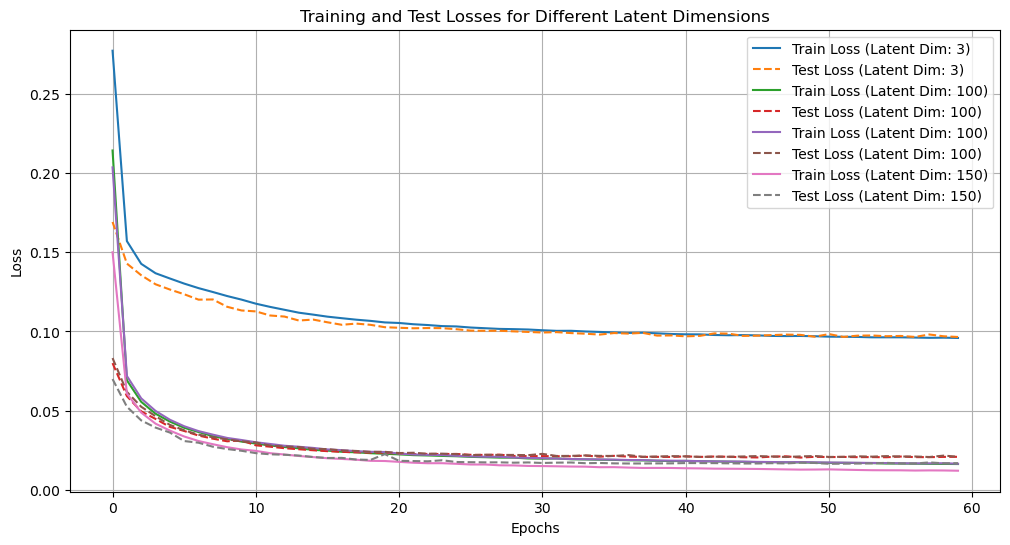

In [32]:
# TODO: Visualize the results
plt.figure(figsize=(12, 6))
for i, latent_dim in enumerate(latent_dims):
    plt.plot(train_losses[i], label=f'Train Loss (Latent Dim: {latent_dim})')
    plt.plot(test_losses[i], label=f'Test Loss (Latent Dim: {latent_dim})', linestyle='--')
plt.title('Training and Test Losses for Different Latent Dimensions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

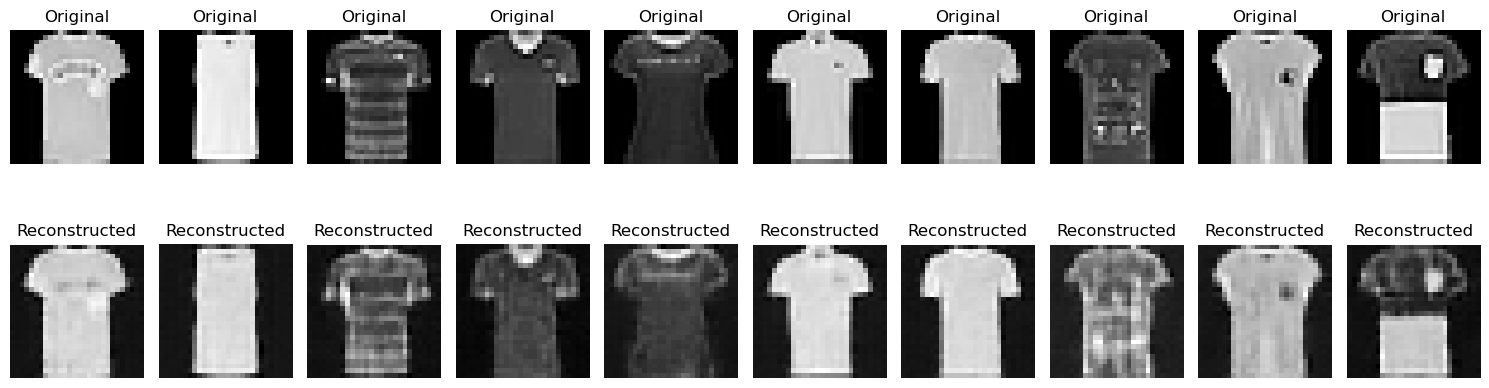

In [33]:
#TODO: Visualize the reconstructed images and the original images
def visualize_reconstruction(model, data_loader, device):
    model.eval()
    with tc.no_grad():
        X, _ = next(iter(data_loader))
        X = X.to(device)
        reconstructed = model(X)

    # Plot original and reconstructed images
    fig, axs = plt.subplots(2, 10, figsize=(15, 5))
    for i in range(10):
        axs[0, i].imshow(X[i].cpu().squeeze(), cmap='gray')
        axs[0, i].set_title("Original")
        axs[0, i].axis('off')
        
        axs[1, i].imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
        axs[1, i].set_title("Reconstructed")
        axs[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()
visualize_reconstruction(conv_ae_model, test_loader, device)

### Task 3

A linear autoencoder aims to represent the data $X\in \mathbb{R}^{n\times m}$ in a new basis using only $d<m$ directions.
The objective is to minimize the squared error between $X$ and $D(E(X))$ where $E: \mathbb{R}^{m}\to\mathbb{R}^{d}$ is the encoder and $D: \mathbb{R}^{d}\to\mathbb{R}^{m}$ is the decoder:
$$\|D(E(X)) - X\|^2_2$$

In geometric terms, we want to find $d$ axes along which most of the variance occurs which is exactly what Principal Component Analysis does. The optimal weights of a linear autoencoder with code dimension $d$ thus span the same space as the first $d$ principal components.

The PCA autoencoder just consists of 1 linear layer for the encoder and 1 linear layer for the decoder. The bias is necessary to subtract the mean value. Since we are dealing with three-dimensional images, we also have to flatten (when encoding) or unflatten (when decoding) the input.

In [42]:
class PCA_AE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(PCA_AE, self).__init__()
        
        # TODO: Initialize the layers of the autoencoder
        self.encoder = nn.Sequential(nn.Linear(input_dim, latent_dim))
        
        self.decoder = nn.Sequential(nn.Linear(latent_dim, input_dim))
        
    def forward(self, X):
        # TODO: Implement the forward call
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


For the training we can use the same function as for the convolutional autoencoder.

In [46]:
n_epochs = 60
lr = 1e-3
# TODO: Train the PCA autoencoder model with a latent dimension of 10 
latent_dim = 10
pca_ae_model = PCA_AE(input_dim=28*28, latent_dim=latent_dim)

pca_ae_model = pca_ae_model.to(device)

loss_function = nn.MSELoss()
optimizer = tc.optim.Adam(pca_ae_model.parameters(), lr=lr)

train_loss = np.zeros(n_epochs)
test_loss = np.zeros(n_epochs)

for epoch in range(1, n_epochs + 1):
    pca_ae_model.train()

    epoch_loss = 0

    for X, _ in train_loader:
        X = X.to(device)
        X = X.view(X.size(0), -1)
        optimizer.zero_grad()
        reconstructed = pca_ae_model(X)
        loss = loss_function(reconstructed, X)
        loss.backward()
        optimizer.step()
        reconstructed = reconstructed.view(X.size(0), 1, 28, 28)

        epoch_loss += loss.item()/len(train_loader)
        
    train_loss[epoch - 1] = epoch_loss
        
    pca_ae_model.eval()

    with tc.no_grad():
        X, _ = next(iter(test_loader))
        X = X.view(X.size(0), -1)
        X = X.to(device)
        reconstructed = pca_ae_model(X)
        loss = loss_function(reconstructed, X)
        reconstructed = reconstructed.view(X.size(0), 1, 28, 28)

            
        test_loss[epoch - 1] = loss.item()
    print(f"Epoch {epoch}/{n_epochs} - Train Loss: {epoch_loss:.4f}, Test Loss: {loss.item():.4f}")


Epoch 1/60 - Train Loss: 0.4480, Test Loss: 0.2590
Epoch 2/60 - Train Loss: 0.2156, Test Loss: 0.1784
Epoch 3/60 - Train Loss: 0.1730, Test Loss: 0.1576
Epoch 4/60 - Train Loss: 0.1549, Test Loss: 0.1434
Epoch 5/60 - Train Loss: 0.1408, Test Loss: 0.1322
Epoch 6/60 - Train Loss: 0.1308, Test Loss: 0.1244
Epoch 7/60 - Train Loss: 0.1240, Test Loss: 0.1187
Epoch 8/60 - Train Loss: 0.1188, Test Loss: 0.1145
Epoch 9/60 - Train Loss: 0.1156, Test Loss: 0.1118
Epoch 10/60 - Train Loss: 0.1131, Test Loss: 0.1092
Epoch 11/60 - Train Loss: 0.1111, Test Loss: 0.1068
Epoch 12/60 - Train Loss: 0.1090, Test Loss: 0.1046
Epoch 13/60 - Train Loss: 0.1070, Test Loss: 0.1025
Epoch 14/60 - Train Loss: 0.1053, Test Loss: 0.1007
Epoch 15/60 - Train Loss: 0.1039, Test Loss: 0.0995
Epoch 16/60 - Train Loss: 0.1027, Test Loss: 0.0986
Epoch 17/60 - Train Loss: 0.1021, Test Loss: 0.0983
Epoch 18/60 - Train Loss: 0.1014, Test Loss: 0.0976
Epoch 19/60 - Train Loss: 0.1011, Test Loss: 0.0973
Epoch 20/60 - Train L

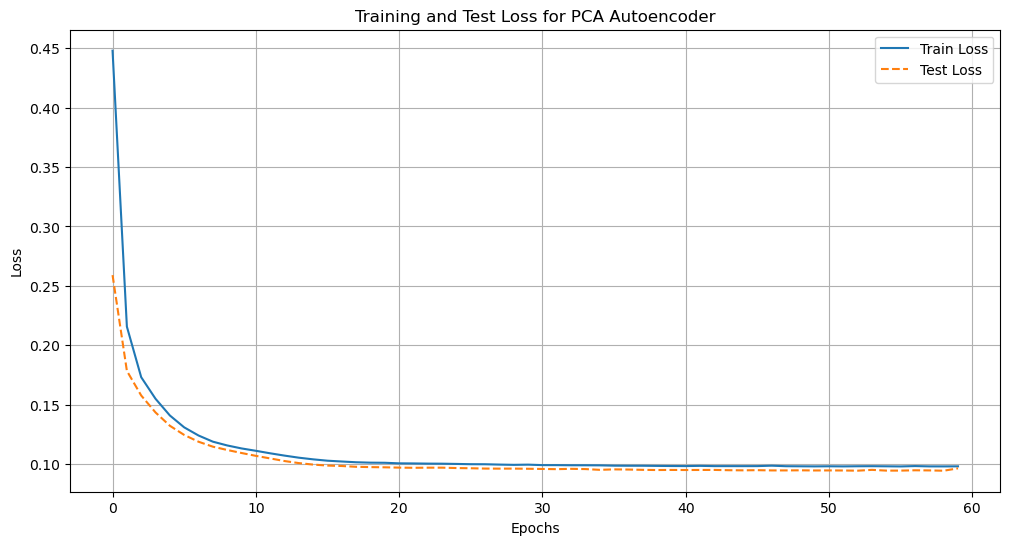

In [47]:
# TODO: Visualize the training and test loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss', linestyle='--')
plt.title('Training and Test Loss for PCA Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [48]:
# TODO: Visualize the reconstructed images and the original images
def visualize_pca_reconstruction(model, data_loader, device):
    model.eval()
    with tc.no_grad():
        X, _ = next(iter(data_loader))
        X = X.view(X.size(0), -1)
        X = X.to(device)
        reconstructed = model(X)
        reconstructed = reconstructed.view(X.size(0), 1, 28, 28)

    fig, axs = plt.subplots(2, 10, figsize=(15, 5))
    for i in range(10):
        axs[0, i].imshow(X[i].cpu().view(28, 28), cmap='gray')
        axs[0, i].set_title("Original")
        axs[0, i].axis('off')
        
        axs[1, i].imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
        axs[1, i].set_title("Reconstructed")
        axs[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()


### Task 4

In [49]:
# TODO: Choose the convolutional autoencoder with latent dimension 3 and encode 800 samples
def encode_samples(model, data_loader, device, num_samples=800):
    model.eval()
    encoded_samples = []
    with tc.no_grad():
        for X, _ in data_loader:
            X = X.to(device)
            encoded = model.encoder(X)
            encoded_samples.append(encoded.cpu().numpy())
            if len(encoded_samples) * X.size(0) >= num_samples:
                break
    return np.concatenate(encoded_samples, axis=0)[:num_samples]

encoded_samples = encode_samples(conv_ae_model, train_loader, device, num_samples=800)

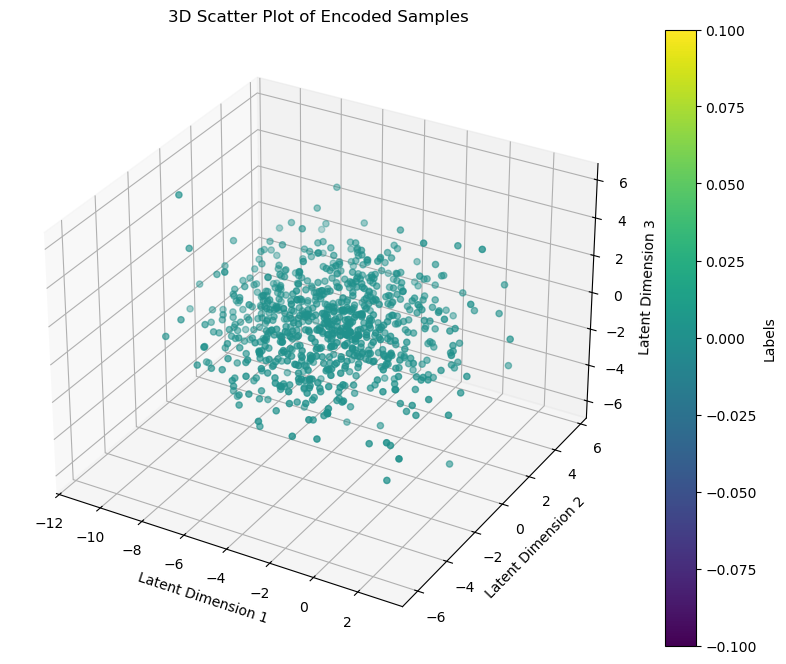

In [50]:
# TODO: Make a 3D scatter plot of the code colored by the labels
def plot_3d_scatter(encoded_samples, labels):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(encoded_samples[:, 0], encoded_samples[:, 1], encoded_samples[:, 2], c=labels, cmap='viridis', s=20)
    plt.colorbar(scatter, ax=ax, label='Labels')
    
    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    ax.set_zlabel('Latent Dimension 3')
    plt.title('3D Scatter Plot of Encoded Samples')
    plt.show()
    
plot_3d_scatter(encoded_samples, train_data.targets.numpy()[:800])